C:\Users\apfox\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py:3577: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


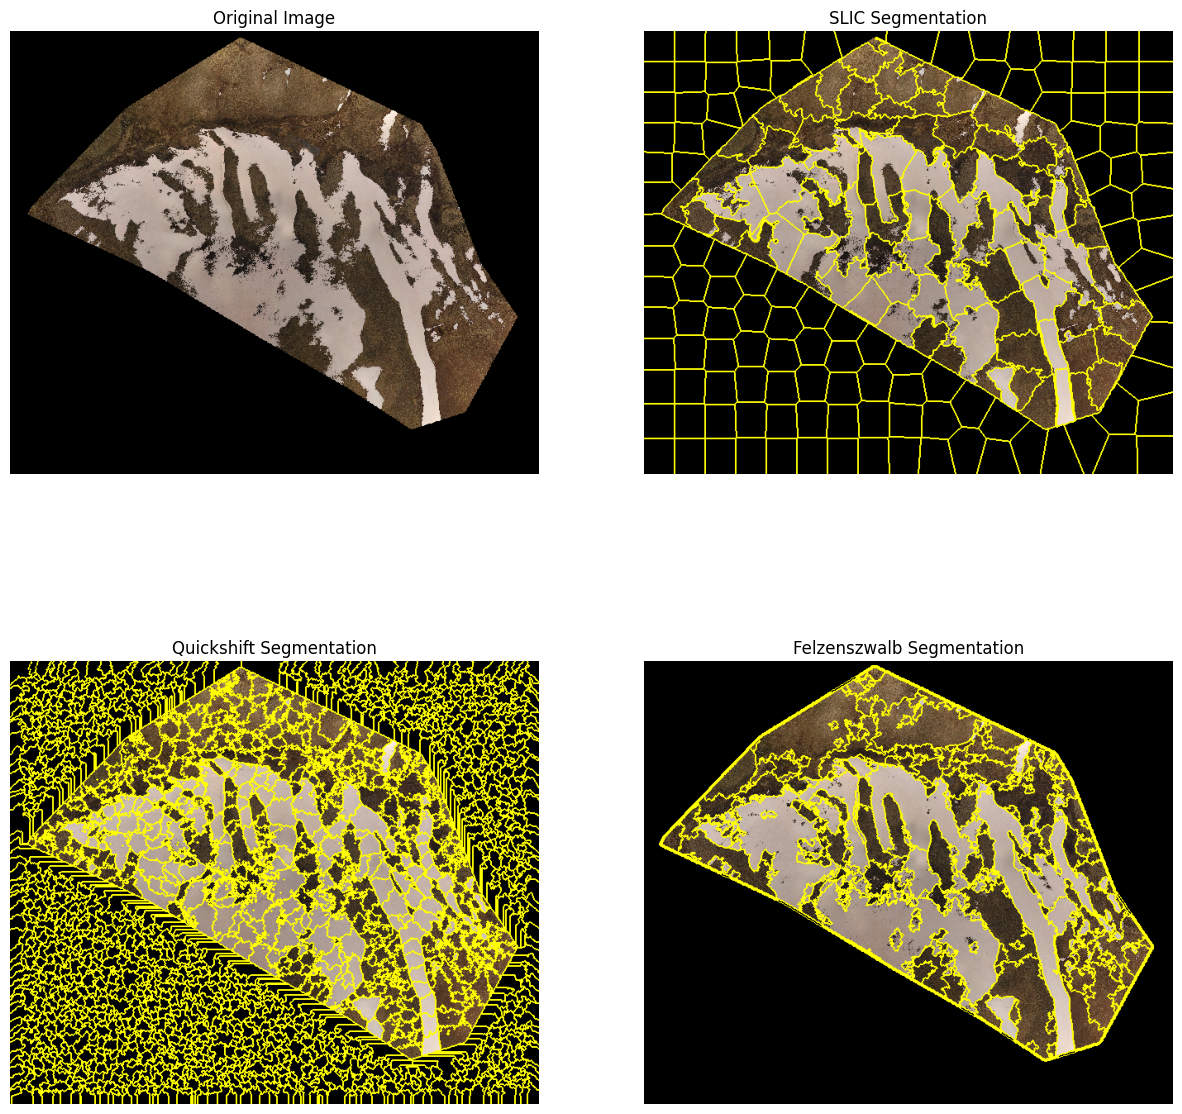

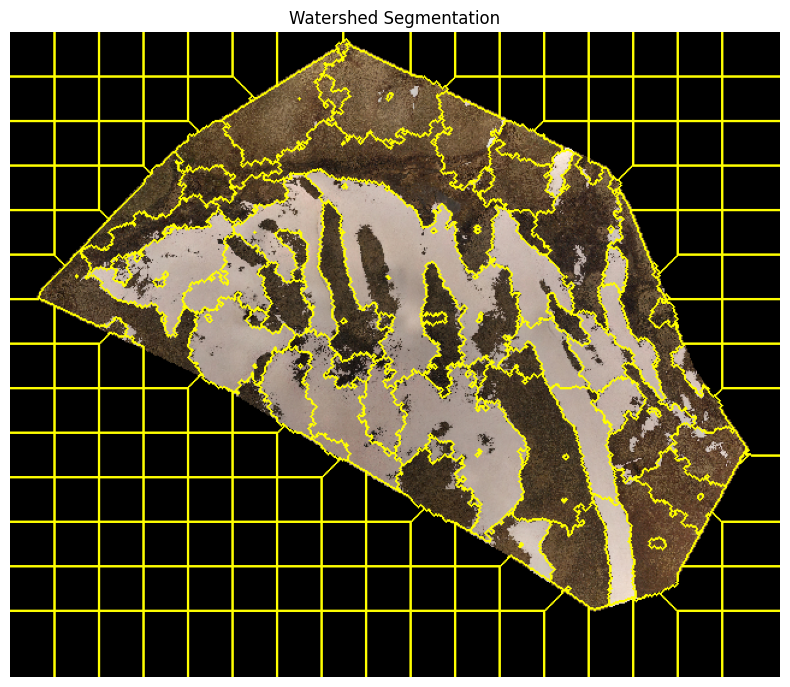

In [4]:
import matplotlib.pyplot as plt
from skimage import io, segmentation, filters
from skimage.morphology import disk
from skimage.segmentation import mark_boundaries, slic, quickshift, watershed
from skimage.color import rgb2gray

# Load the .tif image
image_path = 'data/640/DeerCreekTrail_2019_05_30_snow.tif'
image = io.imread(image_path)

# Convert the image to grayscale if it is not already
gray_image = rgb2gray(image)

# Apply different segmentation algorithms
# 1. SLIC (Simple Linear Iterative Clustering)
segments_slic = slic(image, n_segments=250, compactness=10, sigma=1)

# 2. Quickshift
segments_quickshift = quickshift(image, kernel_size=3, max_dist=6, ratio=0.5)

# 3. Felzenszwalb
segments_felzenszwalb = segmentation.felzenszwalb(image, scale=100, sigma=0.5, min_size=50)

# 4. Watershed
gradient = filters.rank.gradient(gray_image, disk(2))
segments_watershed = watershed(gradient, markers=250, compactness=0.001)

# Display the results
fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image)
ax[0].set_title("Original Image")

ax[1].imshow(mark_boundaries(image, segments_slic))
ax[1].set_title("SLIC Segmentation")

ax[2].imshow(mark_boundaries(image, segments_quickshift))
ax[2].set_title("Quickshift Segmentation")

ax[3].imshow(mark_boundaries(image, segments_felzenszwalb))
ax[3].set_title("Felzenszwalb Segmentation")

fig2, ax2 = plt.subplots(1, 1, figsize=(8, 8))
ax2.imshow(mark_boundaries(image, segments_watershed))
ax2.set_title("Watershed Segmentation")
ax2.set_axis_off()

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()
